In [1]:
import pathlib

import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [3]:
dataset_path

'/home/mark/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

In [5]:
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=" ", skipinitialspace=True)

In [6]:
raw_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset = raw_dataset.copy()

In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.shape

(392, 8)

In [11]:
origin = dataset.pop('Origin')

In [12]:
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [13]:
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin ==2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0

In [14]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [15]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

In [16]:
train_dataset.shape

(314, 10)

In [17]:
dataset.shape

(392, 10)

In [18]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset.shape

(78, 10)

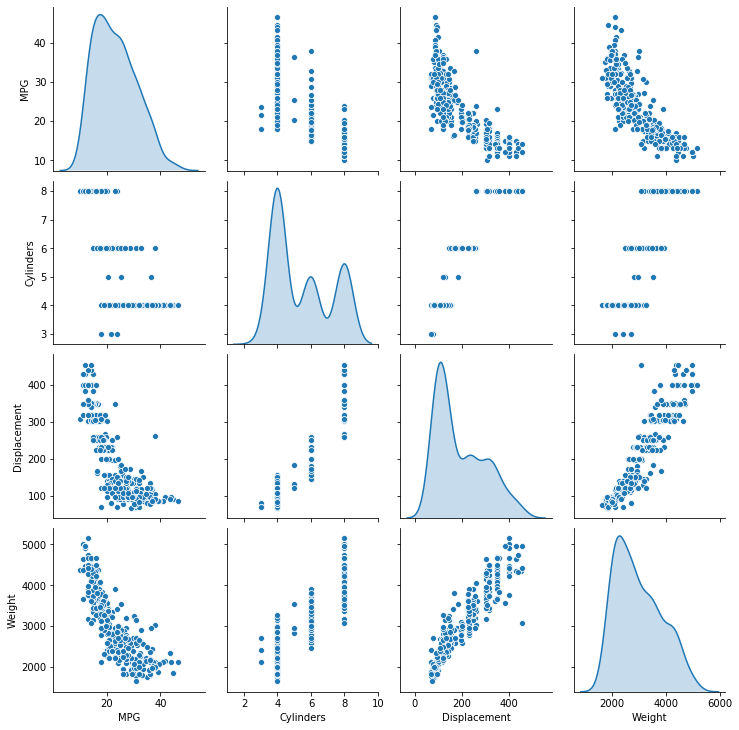

In [19]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [21]:
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [22]:
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [23]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [24]:
train_stats['mean']

Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
USA                0.624204
Europe             0.178344
Japan              0.197452
Name: mean, dtype: float64

In [25]:
train_stats['std']

Cylinders         1.699788
Displacement    104.331589
Horsepower       38.096214
Weight          843.898596
Acceleration      2.789230
Model Year        3.675642
USA               0.485101
Europe            0.383413
Japan             0.398712
Name: std, dtype: float64

In [26]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [27]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [29]:
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


In [30]:
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [32]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse']
    )
    return model

In [33]:
model = build_model()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [35]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.50074494],
       [0.6733172 ],
       [0.42167783],
       [0.2552265 ],
       [0.1024226 ],
       [0.53054935],
       [0.35312507],
       [0.48144364],
       [0.11831513],
       [0.22636539]], dtype=float32)

In [36]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        else:
            print('.', end='')

In [37]:
history = model.fit(
    normed_train_data,
    train_labels,
    epochs=1000,
    validation_split=0.2,
    verbose=0,
    callbacks=[PrintDot()]
)


...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.565029,1.027350,2.565029,8.006532,2.199022,8.006532,995
996,2.807179,1.068318,2.807179,8.212751,2.236410,8.212750,996
997,2.618057,0.986059,2.618057,7.844318,2.145090,7.844318,997
998,2.587072,1.008005,2.587072,8.174335,2.194079,8.174335,998
999,2.663701,1.066805,2.663701,8.750473,2.229811,8.750474,999


In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)